In [30]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense , Flatten,BatchNormalization, Conv2D , MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action = 'ignore',category = FutureWarning)
%matplotlib inline

In [2]:
os.chdir('/Users/mohammedshabo/Desktop/project/corona_dataset')
if os.path.isdir('train/dog') is False:
    os.makedirs('train/dog')
    os.makedirs('train/cat')
    os.makedirs('valid/dog')
    os.makedirs('valid/cat')
    os.makedirs('test/dog')
    os.makedirs('test/cat')

    
    
for c in random.sample(glob.glob('cat*'),200):
    shutil.move(c, 'train/cat' )
for c in random.sample(glob.glob('dog*'),200):
    shutil.move(c,'train/dog')
for c in random.sample(glob.glob('cat*'),100):
    shutil.move(c,'valid/cat')
for c in random.sample(glob.glob('dog*'),100):
    shutil.move(c,'valid/dog')
for c in random.sample(glob.glob('cat*'),20):
    shutil.move(c,'test/cat')
for c in random.sample(glob.glob('dog*'),20):
    shutil.move(c,'test/dog')
    

FileNotFoundError: [Errno 2] No such file or directory: '/Users/mohammedshabo/Desktop/project/corona_dataset'

In [31]:
os.chdir('../../')
train_path = '/Users/mohammedshabo/downloads/dataset/training_set/train'
valid_path = '/Users/mohammedshabo/downloads/dataset/training_set/valid'
test_path = '/Users/mohammedshabo/downloads/dataset/training_set/test'


In [32]:
 
train_batches = ImageDataGenerator(preprocessing_function = tf.keras.applications.resnet_v2.preprocess_input)\
    .flow_from_directory(directory=train_path,target_size=(224,224),classes=['cat','dog'],batch_size=10)
     
validation_batches = ImageDataGenerator(preprocessing_function = tf.keras.applications.resnet_v2.preprocess_input)\
    .flow_from_directory(directory=valid_path, target_size=(224,224), classes=['cat','dog'],batch_size=10)
     
test_batches = ImageDataGenerator(preprocessing_function = tf.keras.applications.resnet_v2.preprocess_input)\
    .flow_from_directory(directory=test_path,target_size=(224,224),classes=['cat','dog'],batch_size=10, shuffle=False)

Found 1600 images belonging to 2 classes.
Found 799 images belonging to 2 classes.
Found 119 images belonging to 2 classes.


In [33]:
images , labels = next(train_batches)

In [34]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1,10, figsize = (20,20))
    axes = axes.flatten()
    for img,ax in zip(images_arr,axes):
        ax.imshow(img)
        ax.axis('off')
        plt.tight_layout()
        plt.show

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

[[0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]]


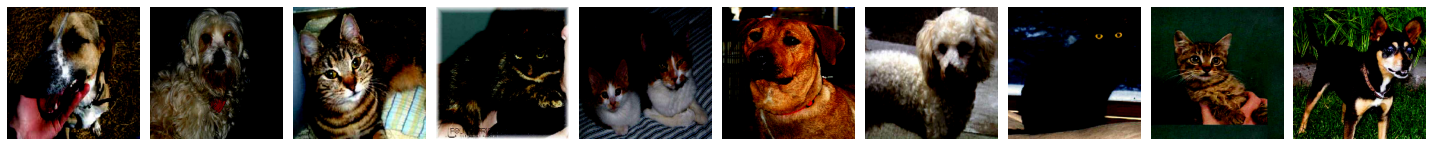

In [35]:
plotImages(images)
print(labels)

In [36]:
model = tf.keras.applications.resnet_v2.ResNet50V2()

In [37]:
#model = Sequential([
    
   # Conv2D(filters=32 , kernel_size=(3,3) , activation='relu', padding = 'same' , input_shape=(224,224,3)),
    #MaxPool2D(pool_size=(2,2),strides=2),
    #Conv2D(filters=64 , kernel_size=(3,3) , activation='relu', padding = 'same' ),
   # MaxPool2D(pool_size=(2,2),strides=2),
    #Conv2D(filters = 128 , kernel_size = (3,3), activation = 'relu' , padding = 'same'),
    #MaxPool2D(pool_size = (2,2), strides = 2),
    #Flatten(),
a = model.layers[-2].output
b = Dense(units = 32 , activation ='relu')(a)
o =  Dense(units = 2, activation='sigmoid')(b)
    
resnet = tf.keras.models.Model(inputs = model.input , outputs = o)
#])

In [38]:
resnet.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 114, 114, 64) 0           conv1_conv[0][0]                 
____________________________________________________________________________________________

In [39]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [40]:
model.fit(x=train_batches ,validation_data = validation_batches , epochs =3, verbose=2)

Epoch 1/3


2022-01-17 18:50:29.110623: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


InvalidArgumentError: 2 root error(s) found.
  (0) INVALID_ARGUMENT:  Incompatible shapes: [10,2] vs. [10,1000]
	 [[node binary_crossentropy/logistic_loss/mul
 (defined at /Users/mohammedshabo/miniforge3/envs/m1_chip/lib/python3.9/site-packages/keras/backend.py:5000)
]]
	 [[binary_crossentropy/logistic_loss/_26]]
  (1) INVALID_ARGUMENT:  Incompatible shapes: [10,2] vs. [10,1000]
	 [[node binary_crossentropy/logistic_loss/mul
 (defined at /Users/mohammedshabo/miniforge3/envs/m1_chip/lib/python3.9/site-packages/keras/backend.py:5000)
]]
0 successful operations.
0 derived errors ignored. [Op:__inference_train_function_37238]

Errors may have originated from an input operation.
Input Source operations connected to node binary_crossentropy/logistic_loss/mul:
In[0] resnet50v2/predictions/BiasAdd (defined at /Users/mohammedshabo/miniforge3/envs/m1_chip/lib/python3.9/site-packages/keras/layers/core/dense.py:210)	
In[1] IteratorGetNext (defined at /Users/mohammedshabo/miniforge3/envs/m1_chip/lib/python3.9/site-packages/keras/engine/training.py:841)

Operation defined at: (most recent call last)
>>>   File "/Users/mohammedshabo/miniforge3/envs/m1_chip/lib/python3.9/runpy.py", line 197, in _run_module_as_main
>>>     return _run_code(code, main_globals, None,
>>> 
>>>   File "/Users/mohammedshabo/miniforge3/envs/m1_chip/lib/python3.9/runpy.py", line 87, in _run_code
>>>     exec(code, run_globals)
>>> 
>>>   File "/Users/mohammedshabo/miniforge3/envs/m1_chip/lib/python3.9/site-packages/ipykernel_launcher.py", line 16, in <module>
>>>     app.launch_new_instance()
>>> 
>>>   File "/Users/mohammedshabo/miniforge3/envs/m1_chip/lib/python3.9/site-packages/traitlets/config/application.py", line 846, in launch_instance
>>>     app.start()
>>> 
>>>   File "/Users/mohammedshabo/miniforge3/envs/m1_chip/lib/python3.9/site-packages/ipykernel/kernelapp.py", line 677, in start
>>>     self.io_loop.start()
>>> 
>>>   File "/Users/mohammedshabo/miniforge3/envs/m1_chip/lib/python3.9/site-packages/tornado/platform/asyncio.py", line 199, in start
>>>     self.asyncio_loop.run_forever()
>>> 
>>>   File "/Users/mohammedshabo/miniforge3/envs/m1_chip/lib/python3.9/asyncio/base_events.py", line 596, in run_forever
>>>     self._run_once()
>>> 
>>>   File "/Users/mohammedshabo/miniforge3/envs/m1_chip/lib/python3.9/asyncio/base_events.py", line 1890, in _run_once
>>>     handle._run()
>>> 
>>>   File "/Users/mohammedshabo/miniforge3/envs/m1_chip/lib/python3.9/asyncio/events.py", line 80, in _run
>>>     self._context.run(self._callback, *self._args)
>>> 
>>>   File "/Users/mohammedshabo/miniforge3/envs/m1_chip/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 457, in dispatch_queue
>>>     await self.process_one()
>>> 
>>>   File "/Users/mohammedshabo/miniforge3/envs/m1_chip/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 446, in process_one
>>>     await dispatch(*args)
>>> 
>>>   File "/Users/mohammedshabo/miniforge3/envs/m1_chip/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 353, in dispatch_shell
>>>     await result
>>> 
>>>   File "/Users/mohammedshabo/miniforge3/envs/m1_chip/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 648, in execute_request
>>>     reply_content = await reply_content
>>> 
>>>   File "/Users/mohammedshabo/miniforge3/envs/m1_chip/lib/python3.9/site-packages/ipykernel/ipkernel.py", line 353, in do_execute
>>>     res = shell.run_cell(code, store_history=store_history, silent=silent)
>>> 
>>>   File "/Users/mohammedshabo/miniforge3/envs/m1_chip/lib/python3.9/site-packages/ipykernel/zmqshell.py", line 533, in run_cell
>>>     return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
>>> 
>>>   File "/Users/mohammedshabo/miniforge3/envs/m1_chip/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 2901, in run_cell
>>>     result = self._run_cell(
>>> 
>>>   File "/Users/mohammedshabo/miniforge3/envs/m1_chip/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 2947, in _run_cell
>>>     return runner(coro)
>>> 
>>>   File "/Users/mohammedshabo/miniforge3/envs/m1_chip/lib/python3.9/site-packages/IPython/core/async_helpers.py", line 68, in _pseudo_sync_runner
>>>     coro.send(None)
>>> 
>>>   File "/Users/mohammedshabo/miniforge3/envs/m1_chip/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3172, in run_cell_async
>>>     has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
>>> 
>>>   File "/Users/mohammedshabo/miniforge3/envs/m1_chip/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3364, in run_ast_nodes
>>>     if (await self.run_code(code, result,  async_=asy)):
>>> 
>>>   File "/Users/mohammedshabo/miniforge3/envs/m1_chip/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3444, in run_code
>>>     exec(code_obj, self.user_global_ns, self.user_ns)
>>> 
>>>   File "/var/folders/cg/33zg6hgs0rd8fknw9443rhg80000gn/T/ipykernel_2203/3097371461.py", line 1, in <module>
>>>     model.fit(x=train_batches ,validation_data = validation_batches , epochs =3, verbose=2)
>>> 
>>>   File "/Users/mohammedshabo/miniforge3/envs/m1_chip/lib/python3.9/site-packages/keras/engine/training.py", line 1184, in fit
>>>     tmp_logs = self.train_function(iterator)
>>> 
>>>   File "/Users/mohammedshabo/miniforge3/envs/m1_chip/lib/python3.9/site-packages/keras/engine/training.py", line 853, in train_function
>>>     return step_function(self, iterator)
>>> 
>>>   File "/Users/mohammedshabo/miniforge3/envs/m1_chip/lib/python3.9/site-packages/keras/engine/training.py", line 842, in step_function
>>>     outputs = model.distribute_strategy.run(run_step, args=(data,))
>>> 
>>>   File "/Users/mohammedshabo/miniforge3/envs/m1_chip/lib/python3.9/site-packages/keras/engine/training.py", line 835, in run_step
>>>     outputs = model.train_step(data)
>>> 
>>>   File "/Users/mohammedshabo/miniforge3/envs/m1_chip/lib/python3.9/site-packages/keras/engine/training.py", line 788, in train_step
>>>     loss = self.compiled_loss(
>>> 
>>>   File "/Users/mohammedshabo/miniforge3/envs/m1_chip/lib/python3.9/site-packages/keras/engine/compile_utils.py", line 201, in __call__
>>>     loss_value = loss_obj(y_t, y_p, sample_weight=sw)
>>> 
>>>   File "/Users/mohammedshabo/miniforge3/envs/m1_chip/lib/python3.9/site-packages/keras/losses.py", line 141, in __call__
>>>     losses = call_fn(y_true, y_pred)
>>> 
>>>   File "/Users/mohammedshabo/miniforge3/envs/m1_chip/lib/python3.9/site-packages/keras/losses.py", line 245, in call
>>>     return ag_fn(y_true, y_pred, **self._fn_kwargs)
>>> 
>>>   File "/Users/mohammedshabo/miniforge3/envs/m1_chip/lib/python3.9/site-packages/keras/losses.py", line 1809, in binary_crossentropy
>>>     backend.binary_crossentropy(y_true, y_pred, from_logits=from_logits),
>>> 
>>>   File "/Users/mohammedshabo/miniforge3/envs/m1_chip/lib/python3.9/site-packages/keras/backend.py", line 5000, in binary_crossentropy
>>>     return tf.nn.sigmoid_cross_entropy_with_logits(labels=target, logits=output)
>>> 

Input Source operations connected to node binary_crossentropy/logistic_loss/mul:
In[0] resnet50v2/predictions/BiasAdd (defined at /Users/mohammedshabo/miniforge3/envs/m1_chip/lib/python3.9/site-packages/keras/layers/core/dense.py:210)	
In[1] IteratorGetNext (defined at /Users/mohammedshabo/miniforge3/envs/m1_chip/lib/python3.9/site-packages/keras/engine/training.py:841)

Operation defined at: (most recent call last)
>>>   File "/Users/mohammedshabo/miniforge3/envs/m1_chip/lib/python3.9/runpy.py", line 197, in _run_module_as_main
>>>     return _run_code(code, main_globals, None,
>>> 
>>>   File "/Users/mohammedshabo/miniforge3/envs/m1_chip/lib/python3.9/runpy.py", line 87, in _run_code
>>>     exec(code, run_globals)
>>> 
>>>   File "/Users/mohammedshabo/miniforge3/envs/m1_chip/lib/python3.9/site-packages/ipykernel_launcher.py", line 16, in <module>
>>>     app.launch_new_instance()
>>> 
>>>   File "/Users/mohammedshabo/miniforge3/envs/m1_chip/lib/python3.9/site-packages/traitlets/config/application.py", line 846, in launch_instance
>>>     app.start()
>>> 
>>>   File "/Users/mohammedshabo/miniforge3/envs/m1_chip/lib/python3.9/site-packages/ipykernel/kernelapp.py", line 677, in start
>>>     self.io_loop.start()
>>> 
>>>   File "/Users/mohammedshabo/miniforge3/envs/m1_chip/lib/python3.9/site-packages/tornado/platform/asyncio.py", line 199, in start
>>>     self.asyncio_loop.run_forever()
>>> 
>>>   File "/Users/mohammedshabo/miniforge3/envs/m1_chip/lib/python3.9/asyncio/base_events.py", line 596, in run_forever
>>>     self._run_once()
>>> 
>>>   File "/Users/mohammedshabo/miniforge3/envs/m1_chip/lib/python3.9/asyncio/base_events.py", line 1890, in _run_once
>>>     handle._run()
>>> 
>>>   File "/Users/mohammedshabo/miniforge3/envs/m1_chip/lib/python3.9/asyncio/events.py", line 80, in _run
>>>     self._context.run(self._callback, *self._args)
>>> 
>>>   File "/Users/mohammedshabo/miniforge3/envs/m1_chip/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 457, in dispatch_queue
>>>     await self.process_one()
>>> 
>>>   File "/Users/mohammedshabo/miniforge3/envs/m1_chip/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 446, in process_one
>>>     await dispatch(*args)
>>> 
>>>   File "/Users/mohammedshabo/miniforge3/envs/m1_chip/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 353, in dispatch_shell
>>>     await result
>>> 
>>>   File "/Users/mohammedshabo/miniforge3/envs/m1_chip/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 648, in execute_request
>>>     reply_content = await reply_content
>>> 
>>>   File "/Users/mohammedshabo/miniforge3/envs/m1_chip/lib/python3.9/site-packages/ipykernel/ipkernel.py", line 353, in do_execute
>>>     res = shell.run_cell(code, store_history=store_history, silent=silent)
>>> 
>>>   File "/Users/mohammedshabo/miniforge3/envs/m1_chip/lib/python3.9/site-packages/ipykernel/zmqshell.py", line 533, in run_cell
>>>     return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
>>> 
>>>   File "/Users/mohammedshabo/miniforge3/envs/m1_chip/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 2901, in run_cell
>>>     result = self._run_cell(
>>> 
>>>   File "/Users/mohammedshabo/miniforge3/envs/m1_chip/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 2947, in _run_cell
>>>     return runner(coro)
>>> 
>>>   File "/Users/mohammedshabo/miniforge3/envs/m1_chip/lib/python3.9/site-packages/IPython/core/async_helpers.py", line 68, in _pseudo_sync_runner
>>>     coro.send(None)
>>> 
>>>   File "/Users/mohammedshabo/miniforge3/envs/m1_chip/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3172, in run_cell_async
>>>     has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
>>> 
>>>   File "/Users/mohammedshabo/miniforge3/envs/m1_chip/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3364, in run_ast_nodes
>>>     if (await self.run_code(code, result,  async_=asy)):
>>> 
>>>   File "/Users/mohammedshabo/miniforge3/envs/m1_chip/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3444, in run_code
>>>     exec(code_obj, self.user_global_ns, self.user_ns)
>>> 
>>>   File "/var/folders/cg/33zg6hgs0rd8fknw9443rhg80000gn/T/ipykernel_2203/3097371461.py", line 1, in <module>
>>>     model.fit(x=train_batches ,validation_data = validation_batches , epochs =3, verbose=2)
>>> 
>>>   File "/Users/mohammedshabo/miniforge3/envs/m1_chip/lib/python3.9/site-packages/keras/engine/training.py", line 1184, in fit
>>>     tmp_logs = self.train_function(iterator)
>>> 
>>>   File "/Users/mohammedshabo/miniforge3/envs/m1_chip/lib/python3.9/site-packages/keras/engine/training.py", line 853, in train_function
>>>     return step_function(self, iterator)
>>> 
>>>   File "/Users/mohammedshabo/miniforge3/envs/m1_chip/lib/python3.9/site-packages/keras/engine/training.py", line 842, in step_function
>>>     outputs = model.distribute_strategy.run(run_step, args=(data,))
>>> 
>>>   File "/Users/mohammedshabo/miniforge3/envs/m1_chip/lib/python3.9/site-packages/keras/engine/training.py", line 835, in run_step
>>>     outputs = model.train_step(data)
>>> 
>>>   File "/Users/mohammedshabo/miniforge3/envs/m1_chip/lib/python3.9/site-packages/keras/engine/training.py", line 788, in train_step
>>>     loss = self.compiled_loss(
>>> 
>>>   File "/Users/mohammedshabo/miniforge3/envs/m1_chip/lib/python3.9/site-packages/keras/engine/compile_utils.py", line 201, in __call__
>>>     loss_value = loss_obj(y_t, y_p, sample_weight=sw)
>>> 
>>>   File "/Users/mohammedshabo/miniforge3/envs/m1_chip/lib/python3.9/site-packages/keras/losses.py", line 141, in __call__
>>>     losses = call_fn(y_true, y_pred)
>>> 
>>>   File "/Users/mohammedshabo/miniforge3/envs/m1_chip/lib/python3.9/site-packages/keras/losses.py", line 245, in call
>>>     return ag_fn(y_true, y_pred, **self._fn_kwargs)
>>> 
>>>   File "/Users/mohammedshabo/miniforge3/envs/m1_chip/lib/python3.9/site-packages/keras/losses.py", line 1809, in binary_crossentropy
>>>     backend.binary_crossentropy(y_true, y_pred, from_logits=from_logits),
>>> 
>>>   File "/Users/mohammedshabo/miniforge3/envs/m1_chip/lib/python3.9/site-packages/keras/backend.py", line 5000, in binary_crossentropy
>>>     return tf.nn.sigmoid_cross_entropy_with_logits(labels=target, logits=output)
>>> 

Function call stack:
train_function -> train_function


In [16]:
predictions = model.predict(test_batches)

In [22]:
print(np.round(predictions))

[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 